# Project: Investigate a Movie Data from TMDB dataset

## By Thu Trang Bui

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

To illustrate the ability to investigate a dataset, TMDB movies dataset is employed. The dataset includes more than 10,000 movies with 21 fields of information, inclusive of genres, popularity, budget, revenue, cast, director, and so on. From this dataset, the author aims to find out the properties of a popular and profitable movie by answering the following questions:

1. Which genres are most popular from year to year?
2. What properties are correlated with movies having high revenues/profits?
3. Who are the most frequent cast in the profitable movies? Who are the most frequent director in the profitable movies?


In [1]:
# set up import statements for all of the packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# to numeric numbers

pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load data and print out a few lines

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


It can be seen that the columns 'cast' and 'genres' include many strings seperated by the special character "|".

In [4]:
# inspect data types and look for instances of missing or possibly errant data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

It can be seen from the df.info() method that homepage, tagline, keywords and production_companies have a lot of null values. Moreover, these information fields are not critically important to the questions planned to be answered. Thus, those columns should be deleted from the data to make it easier to follow and avoid deleting too many rows.

In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


The df.describe() method demonstrates that budget, revenue and their adjusted columns include a lot of value "0". Thus, we will look at the histogram to see further:

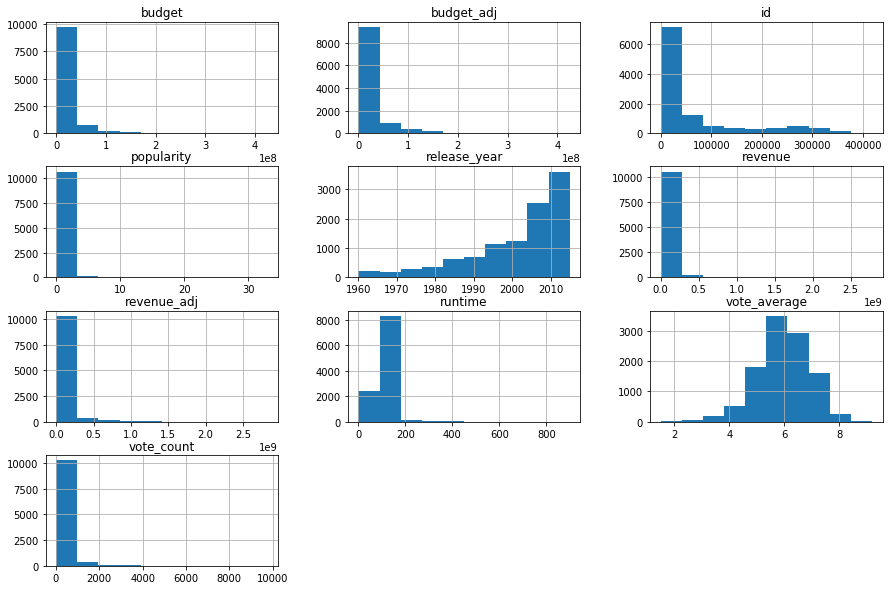

In [7]:
df.hist(figsize = (15,10));

The previous impression about revenue and budget is confirmed by histogram. It is clear that these zero values affect the accuracy and consistency of the dataset, which need to be dropped.

### Data Cleaning

There are several columns which will not be necessary to answer the questions, which shall be deleted from the dataset: 
- imdb_id
- homepage
- tagline
- keywords
- overview
- production_companies
- release date

In addition, many rows of the following columns have a special character "|", which should be defined and modified to have a clean data:
- cast
- director
- genres

Finally, as illustrated in the df.describe() and df.hist() method, runtime, budget and revenue, adjusted budget and revenue contain a lot of value zero. Thus, "0" values will be transfered into "NAN" and these rows will be removed to ensure consistent analysis. After that, we will delete any duplicated rows.

Drop unnecessary columns:

In [8]:
# drop columns

df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis = 1, inplace = True)

Replace the rows containing zero values with NAN and drop those rows from the dataframe:

In [9]:
# replace "0" with "NA" and drop those rows

columns = ['revenue', 'budget', 'revenue_adj', 'budget_adj', 'runtime']
df[columns] = df[columns].replace(0, np.NAN)
df.dropna(axis = 0, inplace = True)

In [10]:
# test

df.shape

(3850, 14)

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.00,3850.00,3850.00,3850.00,3850.00,3850.00,3850.00,3850.00,3850.00,3850.00
mean,39885.75,1.19,37246977.16,107787058.93,109.21,528.28,6.17,2001.26,44289889.01,137195925.29
std,67240.16,1.48,42211665.40,176602976.66,19.91,880.25,0.79,11.29,44808371.61,216184829.85
min,5.00,0.00,1.00,2.00,15.00,10.00,2.20,1960.00,0.97,2.37
25%,6072.25,0.46,10000000.00,13632728.25,95.00,71.00,5.70,1995.00,13172182.04,18414975.58
50%,11316.00,0.80,24000000.00,44884723.50,106.00,204.50,6.20,2004.00,30045238.97,61790728.18
75%,38578.00,1.37,50000000.00,124296916.75,119.00,580.75,6.70,2010.00,60728665.94,163377455.06
max,417859.00,32.99,425000000.00,2781505847.00,338.00,9767.00,8.40,2015.00,425000000.00,2827123750.41


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 14 columns):
id                3850 non-null int64
popularity        3850 non-null float64
budget            3850 non-null float64
revenue           3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
runtime           3850 non-null float64
genres            3850 non-null object
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
budget_adj        3850 non-null float64
revenue_adj       3850 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 451.2+ KB


Currently, the dataset has no zero value in budget and revenue columns. The dataset now includes only 3850 movies, with 14 columns of information. Now we will modify the columns with "|":

In [13]:
# split string by '|', divide into various columns with director column, 
# since films usually have only 1 main director, we will split string and 
# take the first director and the director column will be replaced in the original dataframe

df.director = df.director.str.split("|").str[0]

In [14]:
df.director.value_counts()[0:20]

Steven Spielberg        27
Clint Eastwood          24
Ridley Scott            21
Woody Allen             18
Steven Soderbergh       17
Tim Burton              17
Martin Scorsese         17
Oliver Stone            15
Brian De Palma          15
Renny Harlin            15
Robert Zemeckis         15
Robert Rodriguez        15
Ron Howard              14
Tony Scott              14
Wes Craven              14
Joel Schumacher         14
Francis Ford Coppola    13
Richard Donner          13
John Carpenter          12
Walter Hill             12
Name: director, dtype: int64

In [15]:
# split string by '|' for cast and genres
# create two dataframe genres and cast to store these values

def separate(x):
    return x.str[0:].str.split('|', expand = True)
genres = separate(df['genres'])
cast = separate(df['cast'])

In [16]:
#data frame genres 
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 5 columns):
0    3850 non-null object
1    3203 non-null object
2    2110 non-null object
3    872 non-null object
4    260 non-null object
dtypes: object(5)
memory usage: 180.5+ KB


In [17]:
#copy id column from the original dataframe to genres and cast dataframe 
#to merge in the next part of investigating data
genres['id'] = df['id']
cast['id'] = df['id']

In [18]:
# turn columns into rows for cast and genres data
def col_into_row(x):
    return pd.melt(x, col_level = 0, id_vars = 'id', value_vars = [0,1,2,3,4]) 

genres = col_into_row(genres)
cast = col_into_row(cast)

In [19]:
genres.head()

,id,variable,value
0,135397,0,Action
1,76341,0,Action
2,262500,0,Adventure
3,140607,0,Action
4,168259,0,Action


In [20]:
# drop variable column as not necessary
 
genres.drop('variable', axis=1, inplace=True)
cast.drop('variable', axis=1, inplace=True)

In [21]:
#test

genres.head()

,id,value
0,135397,Action
1,76341,Action
2,262500,Adventure
3,140607,Action
4,168259,Action


In [22]:
#rename columns value in genres and cast dataframe

genres.rename(columns = {'value':'genres'}, inplace = True)
cast.rename(columns = {'value':'cast'}, inplace = True)

Finally, duplicated rows will be removed:

In [23]:
# remove duplicated rows

genres.dropna(inplace = True)
cast.dropna(inplace = True)

In [24]:
# test

genres.drop_duplicates(inplace = True), cast.drop_duplicates(inplace = True) 

(None, None)

After creating dataframe genres and cast, we come back to the original df and clean it:

In [25]:
df = df.drop(columns = ['cast', 'genres'], axis = 1)

In [26]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,150000000.00,1513528810.00,Jurassic World,Colin Trevorrow,124.00,5562,6.50,2015,137999939.28,1392445892.52
1,76341,28.42,150000000.00,378436354.00,Mad Max: Fury Road,George Miller,120.00,6185,7.10,2015,137999939.28,348161292.49
2,262500,13.11,110000000.00,295238201.00,Insurgent,Robert Schwentke,119.00,2480,6.30,2015,101199955.47,271619025.41
3,140607,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,J.J. Abrams,136.00,5292,7.50,2015,183999919.04,1902723129.80
4,168259,9.34,190000000.00,1506249360.00,Furious 7,James Wan,137.00,2947,7.30,2015,174799923.09,1385748801.47


In [27]:
# remove duplicated rows if any 

df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [28]:
df.dtypes

id                  int64
popularity        float64
budget            float64
revenue           float64
original_title     object
director           object
runtime           float64
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

This is how the final dataset look like after data cleaning:

In [29]:
print('The movie dataset now has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The movie dataset now has 3849 rows and 12 columns.


After cleaning, I store the three dataframes into new csv files:

In [31]:
genres.to_csv('genres.csv', index = False)
cast.to_csv('cast.csv', index = False)
df.to_csv('cleaned_movie_dataset.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Which genres are most popular from year to year?

Firstly, based on the number of movie made in each genre, we have the following genres in which films are made the most:

In [30]:
# use value_counts to find the number of films in each genre

genres['genres'].value_counts()

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              12
TV Movie              1
Name: genres, dtype: int64

Plot the bar graph to visualise the genres with higher number of movies produced:

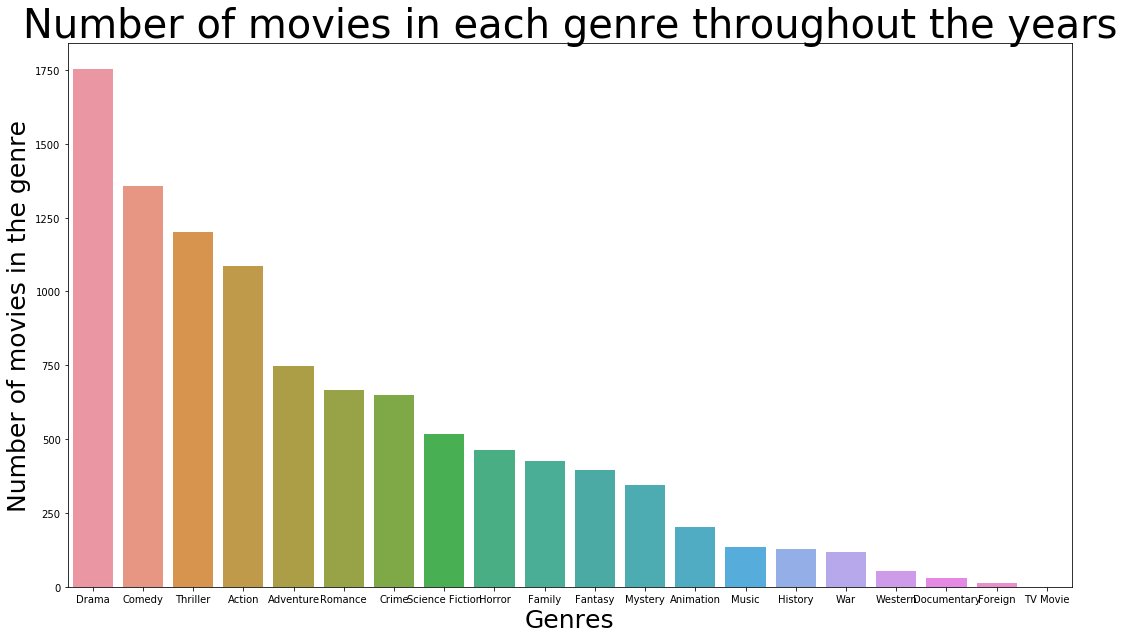

In [31]:
plt.figure(figsize = (18,10))
sns.countplot(x = "genres", data = genres, order = genres['genres'].value_counts().index) 
plt.xlabel('Genres' , fontsize = 25)
plt.ylabel('Number of movies in the genre' , fontsize = 25)
plt.title('Number of movies in each genre throughout the years',fontsize = 40)
plt.show();

It is clear that drama, comedy and thriller are the top three genres which have the most films throughout the investigated period.

Secondly, utilising the data about popularity, we can find out the most popular genre in each year based on the mean of popularity of each genre group by release year as follows:

In [32]:
# merging data of genres and the cleaned movie dataset

popular_genres = pd.merge(df, genres, how = 'inner', on = 'id')

# defining the mean of popularity of each genre in each release year 

mean_popu = popular_genres.groupby(['release_year','genres']).mean()

# popular genres over years are defined by idxmax method

pop_genres_over_years = mean_popu.loc[mean_popu.groupby('release_year')['popularity'].idxmax()]  
pop_genres_over_years

,,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,genres,,,,,,,,,
1960,Horror,539.00,2.61,806948.00,32000000.00,109.00,1180.00,8.00,5949601.34,235934958.63
1961,Animation,12230.00,2.63,4000000.00,215880014.00,79.00,913.00,6.60,29179444.83,1574814739.70
1962,Thriller,646.00,3.17,1100000.00,59600000.00,110.00,560.00,6.70,7929293.77,429623553.17
1963,Adventure,3291.00,1.59,3250000.00,41949382.50,143.50,433.50,7.10,23140582.96,298687127.93
1964,Action,658.00,3.15,3500000.00,124900000.00,110.00,602.00,7.00,24605935.94,878080399.54
1965,Thriller,660.00,1.91,11000000.00,141195658.00,130.00,331.00,6.30,76126200.63,977153544.47
1966,Drama,3159.50,0.49,9750000.00,26868344.50,156.50,51.00,7.25,65500643.25,180501933.11
1967,Animation,9325.00,2.55,4000000.00,205843612.00,78.00,928.00,7.00,26147054.96,1345551058.99
1968,Mystery,579.33,1.73,7000000.00,41168741.00,132.33,875.00,7.40,43882745.30,258085339.40


Looking at the above table, it can be seen that during the recent years, animation, fantasy and science fiction movies are more popular to audience. Now we will take a look at popularity and voting score in general (without specifying the release year): 

In [33]:
# genres and their mean popularity over the examined time period

popular_genres.groupby('genres').mean().sort_values(by = 'popularity', ascending = False ).loc[:,'popularity'][0:10]

genres
Science Fiction   1.87
Adventure         1.87
Fantasy           1.75
Animation         1.71
Action            1.57
Family            1.46
Thriller          1.26
War               1.25
Mystery           1.14
Western           1.13
Name: popularity, dtype: float64

From the mean popularity over years, it can be seen that science fiction and adventure are the most popular genre with highest mean popularity, following by fantasy and animation. This is in line with the above table about the most popular genre based on mean popularity, measured in each year. 

In [34]:
# popular genres based on the summary of vote_count

popular_genres.groupby('genres').sum().sort_values(by = 'vote_count', ascending = False ).loc[:,'vote_count'][0:10]

genres
Action             873052
Drama              726444
Adventure          716264
Thriller           659271
Comedy             537993
Science Fiction    502843
Fantasy            355814
Crime              338711
Family             288915
Romance            229408
Name: vote_count, dtype: int64

Assuming that the genres receiving higher total votes are more popular, it can be seen that action, drama and adventure are the top 3 most popular genres, since they have the highest total vote counts.

In [35]:
# popular genres based on mean of vote_average

popular_genres.groupby('genres').mean().sort_values(by = 'vote_average', ascending = False ).loc[:,'vote_average'][0:10]

genres
Documentary   6.78
War           6.59
History       6.58
Western       6.47
Drama         6.40
Animation     6.38
Music         6.31
Crime         6.30
Mystery       6.19
Romance       6.19
Name: vote_average, dtype: float64

The above result demonstrates that documentary and war films receive the highest average vote. We will look at the violin plot to visualise this insight:

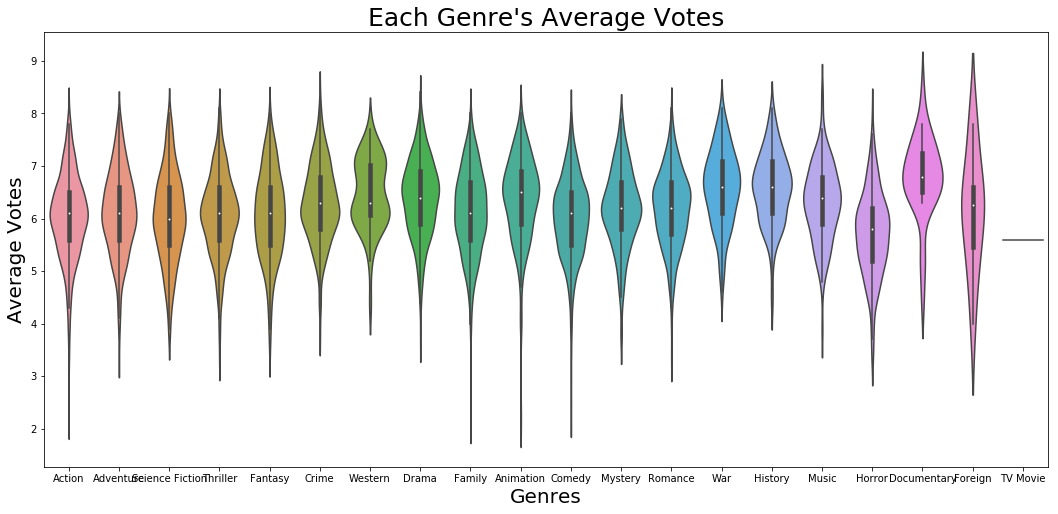

In [36]:
#box plot each genre and its average vote

fig, ax = plt.subplots() 
fig.set_size_inches(18, 8)
sns.violinplot(x = 'genres', y = 'vote_average', data = popular_genres);

#naming x-axis , y-axis & chart title
plt.xlabel('Genres', fontsize = 20);
plt.ylabel('Average Votes', fontsize = 20);
plt.title('Each Genre\'s Average Votes', fontsize = 25);

The violin plot visualises the average vote of each genre. It illustrates that documentary has the highest average vote. 

### Research Question 2  - What properties are correlated with movies having high revenues/profits?

This section examines whether higher revenues/profits are associated with genres, budget, popularity and vote_average. I will utilise the adjusted revenues and budgets (i.e.  the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation) to be consistent and avoid bias.

In [37]:
# calculate profit adjusted = revenue adjusted - budget adjusted

df['profit_adj'] = df['revenue_adj'].sub(df['budget_adj'], axis = 'index')

In [38]:
df.loc[:,['budget_adj', 'revenue_adj', 'profit_adj']].head()

,budget_adj,revenue_adj,profit_adj
0,137999939.28,1392445892.52,1254445953.24
1,137999939.28,348161292.49,210161353.21
2,101199955.47,271619025.41,170419069.94
3,183999919.04,1902723129.80,1718723210.76
4,174799923.09,1385748801.47,1210948878.38


In [39]:
df.profit_adj.isnull().sum()

0

### 2.1. Revenue/Profit and Genres

First of all, we will analyse if high revenue/profit is correlated with the genres of the movies.

In [40]:
# merging genres data into the dataframe

profit_movies = pd.merge(df, genres, how = 'inner', on = 'id')

Now we will calculate the mean profit and revenue of each genre to find out the genres with highest average revenue and profit

In [41]:
# calculate mean adjusted profit of each genre and sort values by descending order

profit_movies.groupby('genres').mean().sort_values(by = 'profit_adj', ascending = False).loc[:,'profit_adj'][0:10]

genres
Animation         207485229.35
Adventure         190151742.58
Family            172690036.45
Fantasy           169755235.39
Science Fiction   136535918.49
Action            128945315.33
Music             100904417.68
War                98625164.36
Thriller           83641605.33
Comedy             82187498.82
Name: profit_adj, dtype: float64

In [42]:
# calculate mean adjusted revenue of each genre and sort values by descending order

profit_movies.groupby('genres').mean().sort_values(by = 'revenue_adj', ascending = False).loc[:,'revenue_adj'][0:10]

genres
Animation         290957382.26
Adventure         271407469.11
Fantasy           249992751.60
Family            243791030.52
Science Fiction   202153142.41
Action            195387938.30
War               155898111.71
Music             136566235.27
Western           135674767.39
Thriller          128277423.93
Name: revenue_adj, dtype: float64

Based on the values of the 10 most profitable genres, it can be seen that animation, adventure, family and fantasy movies tend to have high average profit. This is in line with the highest average revenue genres. In the next step, I will calculate total profit and revenue of each genre to see if this is in line with average value:

In [43]:
# calculate sum of adjusted profit of each genre and sort values by descending order

profit_movies.groupby('genres').sum().sort_values(by = 'profit_adj', ascending = False).loc[:, 'profit_adj'][0:10]

genres
Adventure         142423655191.30
Action            139905667129.29
Drama             117065737741.49
Comedy            111528435900.87
Thriller          100620851206.13
Family             73393265492.80
Science Fiction    70862141698.36
Fantasy            67223073214.42
Romance            53096658025.14
Crime              45885778798.36
Name: profit_adj, dtype: float64

In [44]:
# calculate the sum of adjusted revenue of each genre and sort values by descending order

profit_movies.groupby('genres').sum().sort_values(by = 'revenue_adj', ascending = False).loc[:,'revenue_adj'][0:10]

genres
Action            211995913052.47
Adventure         203284194362.06
Drama             178008344081.34
Comedy            164725841102.20
Thriller          154317740988.44
Science Fiction   104917480910.93
Family            103611187968.93
Fantasy            98997129635.29
Romance            75706596123.14
Crime              71867233021.74
Name: revenue_adj, dtype: float64

When looking at total profit and total revenue of each genre, it can be seen that adventure, action and drama, comedy have higher total profits. This is not similar to the average method. Thus, it can be seen that depending on the method we choose to examine, the results for the trend of most profitable genres vary.

### 2.2. Revenue/Profit and Popularity

Now, we will analyse if high revenue/profit is correlated with the popularity of the movies.

<Figure size 1080x576 with 0 Axes>

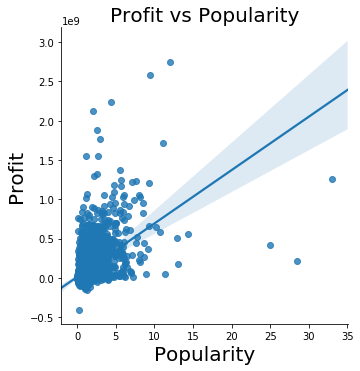

In [45]:
# plot the linear relationship between popularity of movies and their profit

plt.figure(figsize = (15,8))
sns.lmplot(x = 'popularity', y = 'profit_adj', data = df)
plt.xlabel('Popularity', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)
plt.title('Profit vs Popularity',fontsize = 20);

In [46]:
# calculate the correlation between popularity and adjusted profit

df[['profit_adj', 'popularity']].corr(method = 'pearson')

,profit_adj,popularity
profit_adj,1.00,0.52
popularity,0.52,1.00


<Figure size 1080x576 with 0 Axes>

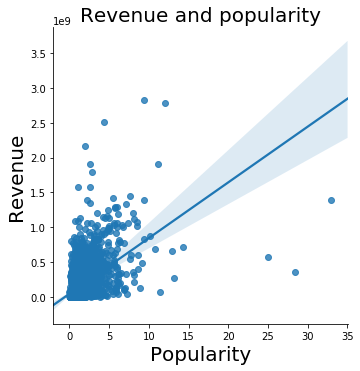

In [47]:
# plot the linear relationship between popularity of movies and their revenue

plt.figure(figsize = (15,8))
sns.lmplot(x = 'popularity', y = 'revenue_adj', data = df)
plt.xlabel('Popularity', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)
plt.title('Revenue and popularity', fontsize = 20);

In [48]:
# calculate the correlation between popularity and adjusted revenue

df[['revenue_adj', 'popularity']].corr(method = 'pearson')

,revenue_adj,popularity
revenue_adj,1.00,0.55
popularity,0.55,1.00


The linear relationship plot and the correlation calculation between 2 variables popularity and profit or revenue demonstrate that there is a positive relationship between the popularity and profitability of a film. However, this relationship is very weak, since the correlation is only around 0.5.

### 2.3. Revenue/Profit and Budget

Now, we will examine whether high revenue/profit depends on the budget to product the movies

<Figure size 1080x576 with 0 Axes>

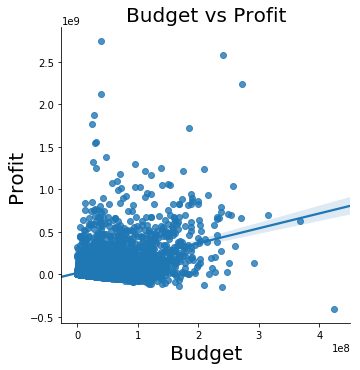

In [49]:
# plot a simple linear relationship between two variables movies' budget and adj profit

plt.figure(figsize = (15,8))
sns.lmplot(x = 'budget_adj', y = 'profit_adj', data = df)
plt.xlabel('Budget', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)
plt.title('Budget vs Profit', fontsize = 20);

In [50]:
# calculate correlation between budget and profit

df[['profit_adj','budget_adj']].corr(method = 'pearson')

,profit_adj,budget_adj
profit_adj,1.00,0.40
budget_adj,0.40,1.00


<Figure size 1080x576 with 0 Axes>

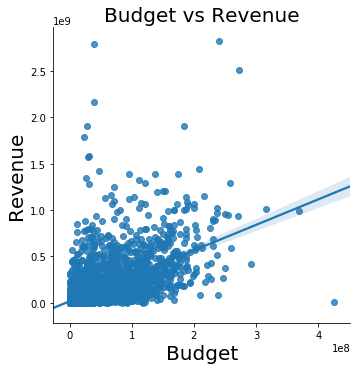

In [51]:
# Plot a simple linear relationship between two variables: movies' budget and adj revenue

plt.figure(figsize = (15,8))
sns.lmplot(x = 'budget_adj', y = 'revenue_adj', data = df)
plt.xlabel('Budget', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)
plt.title('Budget vs Revenue', fontsize = 20);

In [52]:
# calculate correlation between budget and revenue

df[['revenue_adj','budget_adj']].corr(method = 'pearson')

,revenue_adj,budget_adj
revenue_adj,1.00,0.57
budget_adj,0.57,1.00


The budget and revenue seem to have a weak positive correlation at 0.57. The relationship between budget and profit is even weaker. However, it might be due to several outliers. As can be seen from the plot, there are some points in the plot where the budget is extremely high whilst its revenue is quite low. Thus, further study needs to be conducted to delete the outliers to examine these two groups separately.

### 2.4. Revenue/Profit and Voting score

Finally, we will test the relation between high revenue/profit and the vote count/vote average of the films.

<Figure size 1800x576 with 0 Axes>

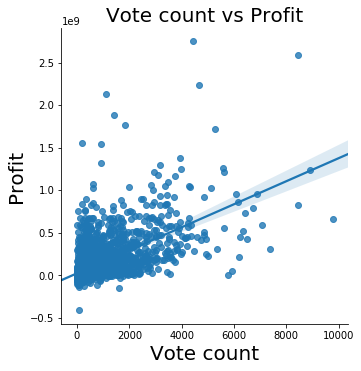

In [53]:
# Plot a simple linear relationship between two variables profit and vote_count

plt.figure(figsize = (25,8))
sns.lmplot(x = 'vote_count', y = 'profit_adj', data = df)
plt.xlabel('Vote count', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)
plt.title('Vote count vs Profit', fontsize = 20);

In [54]:
# calculate pearson correlation between vote count and profit

df[['vote_count', 'profit_adj']].corr()

,vote_count,profit_adj
vote_count,1.00,0.61
profit_adj,0.61,1.00


<Figure size 1800x576 with 0 Axes>

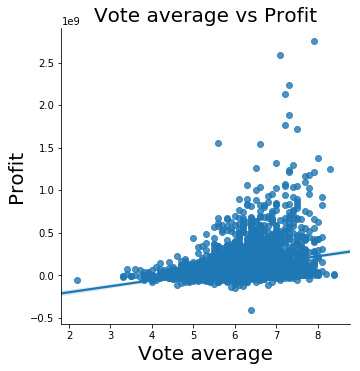

In [55]:
# Plot a simple linear relationship between two variables vote_average and adj profit

plt.figure(figsize = (25,8))
sns.lmplot(x = 'vote_average', y = 'profit_adj', data = df)
plt.xlabel('Vote average', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)
plt.title('Vote average vs Profit', fontsize = 20);

In [56]:
# calculate pearson correlation between vote average and profit

df[['vote_average', 'profit_adj']].corr()

,vote_average,profit_adj
vote_average,1.00,0.29
profit_adj,0.29,1.00


<Figure size 1800x576 with 0 Axes>

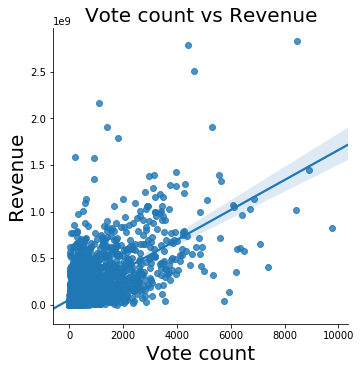

In [57]:
# Plot a simple linear relationship between two variables vote_count and adj revenue

plt.figure(figsize = (25,8))
sns.lmplot(x = 'vote_count', y = 'revenue_adj', data = df)
plt.xlabel('Vote count', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)
plt.title('Vote count vs Revenue', fontsize = 20);

In [58]:
# calculate pearson correlation between vote count and adj revenue

df[['vote_count','revenue_adj']].corr()

,vote_count,revenue_adj
vote_count,1.00,0.65
revenue_adj,0.65,1.00


<Figure size 1800x576 with 0 Axes>

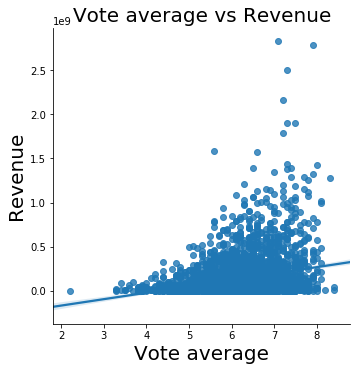

In [59]:
# Plot a simple linear relationship between two variables vote_average and adj revenue

plt.figure(figsize = (25,8))
sns.lmplot(x = 'vote_average', y = 'revenue_adj', data = df)
plt.xlabel('Vote average', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)
plt.title('Vote average vs Revenue', fontsize = 20);

In [60]:
# calculate pearson correlation between vote average and revenue

df[['revenue_adj', 'vote_average']].corr()

,revenue_adj,vote_average
revenue_adj,1.00,0.27
vote_average,0.27,1.00


In all the examined variables, including budget, popularity, genres, voting count and voting average, the variable voting count seems to have the strongest relationship with the revenue and profit of a movie. 

### Research Question 3  - Who are the most frequent cast and director in the profitable movies?

This section examines whether higher revenues/profits are associated with any specific actors/actress and any directors.

In [61]:
# calculate sum adjusted profit of each director and sort values by descending order 
# to take the first 10 directors with highest total profit

df.groupby('director').sum().sort_values(by = 'profit_adj', ascending = False)['profit_adj'][0:10]

director
Steven Spielberg    13126025234.23
James Cameron        6296578359.74
George Lucas         5844159207.50
Peter Jackson        5645491689.79
Robert Zemeckis      4335995165.48
Chris Columbus       4171046474.21
Michael Bay          3958675886.72
David Yates          3394430107.98
Tim Burton           3286788440.84
Christopher Nolan    3149568381.05
Name: profit_adj, dtype: float64

In [62]:
# calculate sum adjusted revenue of each director and sort values by descending order 
# to take the first 10 directors with highest total revenue

df.groupby('director').sum().sort_values(by = 'revenue_adj', ascending = False)['revenue_adj'][0:10]

director
Steven Spielberg    15202446786.62
James Cameron        7327220858.39
Peter Jackson        7019847816.48
George Lucas         6313919162.63
Robert Zemeckis      5655648249.32
Michael Bay          5460671958.24
Chris Columbus       4893485768.13
Tim Burton           4660141181.68
David Yates          4177455259.23
Christopher Nolan    4164261914.93
Name: revenue_adj, dtype: float64

The director Steven Spielberg, James Cameron, George Lucas and Peter Jackson are the top 4 most profitable directors. Their total profits and total revenues rank the highest.

In [63]:
# calculate average of adjusted profit of each director and sort values by descending order 
# to take the first 10 directors with highest average profit

df.groupby('director').mean().sort_values(by = 'profit_adj', ascending = False)['profit_adj'][0:10]

director
Irwin Winkler      1551568265.28
Clyde Geronimi     1545635294.87
Richard Marquand   1182994737.99
Chris Buck         1052306488.21
Kyle Balda          996112046.75
George Lucas        974026534.58
David Yates         848607527.00
James Cameron       787072294.97
Lee Unkrich         707326154.36
Robert Stevenson    676823015.13
Name: profit_adj, dtype: float64

In [64]:
# calculate average adjusted revenue of each director and sort values by descending order 
# to take the first 10 directors with highest average revenue

df.groupby('director').mean().sort_values(by = 'revenue_adj', ascending = False)['revenue_adj'][0:10]

director
Irwin Winkler      1583049536.35
Clyde Geronimi     1574814739.70
Richard Marquand   1253818981.12
Chris Buck         1192711491.12
Kyle Balda         1064192016.80
George Lucas       1052319860.44
David Yates        1044363814.81
James Cameron       915902607.30
Lee Unkrich         878136721.07
Pete Docter         785411574.70
Name: revenue_adj, dtype: float64

However, if using the average profit/revenue as the metric, the directors with highest average profit and revenue for each film he makes are presented in the above table, which is clear that are not the directors with highest total profits. 

In [65]:
# calculate sum adjusted budget of each director and sort values by descending order 
# to take the first 10 directors with highest total budget

df.groupby('director').sum().sort_values(by = 'budget_adj', ascending = False)['revenue_adj'][0:10]

director
Steven Spielberg   15202446786.62
Ridley Scott        4141847535.59
Michael Bay         5460671958.24
Peter Jackson       7019847816.48
Tim Burton          4660141181.68
Robert Zemeckis     5655648249.32
Ron Howard          4011669229.63
Gore Verbinski      3926129889.65
Roland Emmerich     4076980993.48
Martin Scorsese     2425465792.29
Name: revenue_adj, dtype: float64

Looking at the below table of the directors with highest budget for their films, it can be seen that most of them are also present in the table of highest total profit director. 

Now we will find out the casts who appear in the highest profit movies.

In [66]:
# merge cast data into the movie dataframe

cast_film = pd.merge(df, cast, how = 'inner', on = 'id')

In [67]:
# calculate sum adjusted profit of each actor/actress and sort values by descending order 
# to take the first 10 cast with highest total profit

cast_film.groupby('cast').sum().sort_values(by = 'profit_adj', ascending = False)['profit_adj'][0:10]

cast
Harrison Ford      11808415334.78
Tom Cruise          8361768624.64
Tom Hanks           8079464501.99
Carrie Fisher       7263715471.21
Emma Watson         7212039539.84
Daniel Radcliffe    7071883856.51
Mark Hamill         7028274589.10
Rupert Grint        6974591011.98
Ian McKellen        6576083507.35
Sean Connery        6181236271.02
Name: profit_adj, dtype: float64

Looking at the above table, it is apparent that Harrison Ford, Tom Cruise, Tom Hanks, Carrie Fisher and Emma Watson are the five casts who have highest total profit movies.

In [68]:
# calculate mean adjusted profit of each actor/actress and sort values by descending order 
# to take the first 10 cast with highest average profit

cast_film.groupby('cast').mean().sort_values(by = 'profit_adj', ascending = False)['profit_adj'][0:10]

cast
Jason Miller         2128035624.57
Robert MacNaughton   1767968064.02
Daisy Ridley         1718723210.76
Ken Howard           1551568265.28
Wendy Gazelle        1551568265.28
Betty Lou Gerson     1545635294.87
J. Pat O'Malley      1545635294.87
Ben Wright           1545635294.87
Martha Wentworth     1545635294.87
Mark Hamill          1405654917.82
Name: profit_adj, dtype: float64

In [69]:
#create a dataframe of popular cast by calculating sum popularity of each actor and sort values by descending 
#order to take the first 10 cast with highest total popularity score

popu_cast = cast_film.groupby('cast').sum().sort_values(by = 'popularity', ascending = False )[0:10]

In [70]:
popu_cast['cast'] = popu_cast.index.get_level_values(0)

In [71]:
popu_cast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Samuel L. Jackson to Tom Hanks
Data columns (total 12 columns):
id              10 non-null int64
popularity      10 non-null float64
budget          10 non-null float64
revenue         10 non-null float64
runtime         10 non-null float64
vote_count      10 non-null int64
vote_average    10 non-null float64
release_year    10 non-null int64
budget_adj      10 non-null float64
revenue_adj     10 non-null float64
profit_adj      10 non-null float64
cast            10 non-null object
dtypes: float64(8), int64(3), object(1)
memory usage: 1.0+ KB


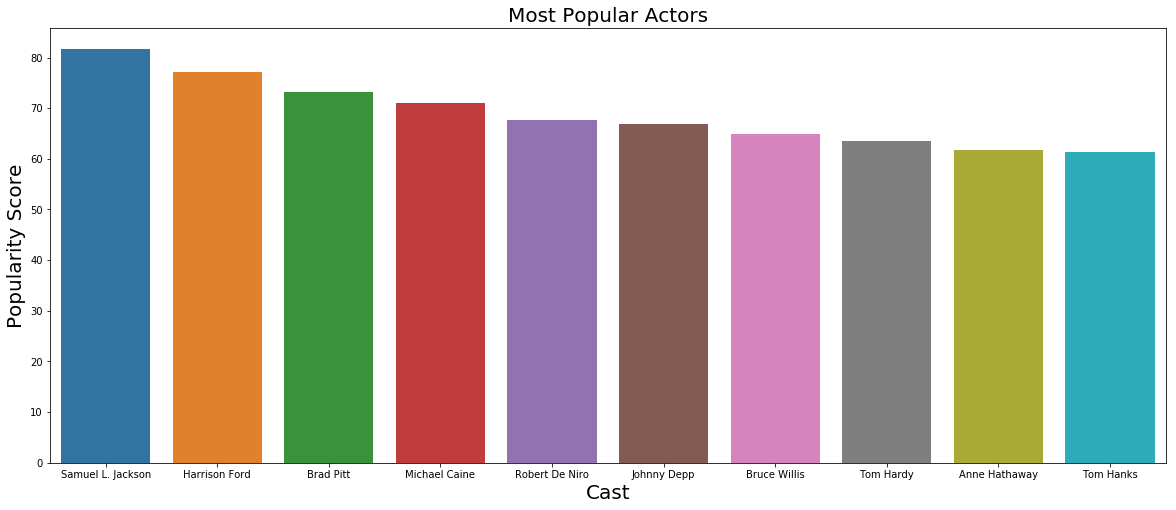

In [72]:
# create a bar plot to visualise the most popular cast based on the popularity score

plt.figure(figsize = (20,8))
sns.barplot(x = 'cast', y = 'popularity', data = popu_cast)
plt.xlabel('Cast', fontsize = 20)
plt.ylabel('Popularity Score', fontsize = 20)
plt.title('Most Popular Actors', fontsize = 20);

From the bar plot of most popular actors, Samuel L. Jackson, Harrison Ford and Brad Pitt are the most famous actors based on the popularity score.

In [75]:
cast_name = popu_cast['cast'].value_counts()

cast_name = cast_name.reset_index()

cast_name.columns = ['words', 'count']

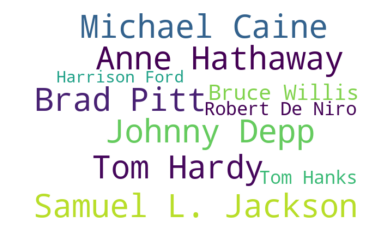

In [78]:
# Create word cloud.
d = {}
for a, x in cast_name.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white')
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



<a id='conclusions'></a>
## Conclusions


In conclusion, if looking at the total movies made throughout the years, drama, comedy and thriller are the top three genres which have the most films. However, relying on the popularity score, it can be concluded that science fiction, adventure, fantasy and animation are the most popular genre with the highest average popularity.

Regarding the most profitable directors and actors, it is apparent that Harrison Ford, Tom Cruise, Tom Hanks, Carrie Fisher and Emma Watson are the five casts who have highest total profit movies. The directors Steven Spielberg, James Cameron, George Lucas and Peter Jackson are the top most profitable directors, as their total profits and total revenues rank the highest.

In this research, I also conducted the analysis to find out the relationship between the budget, genre, voting score and popularity with the profitability of a movie. However, the correlation between these variables is not strong. This can be due to the lack of data and the existence of many outliers. In further research, if these limitations can be tackled, the results may be more precise and accurate. Another limitation of this research if that there are too many missing values as well as a lot of zero values in budget and revenue variables, which made me delete a lot of rows while doing the cleaning data. Thus, only more than 3,000 entries are examined, which is also a reason leading to the bias results.